In [1]:
%matplotlib  inline
%precision %.2f

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fifa18.csv")
df.shape

(506, 5)

## Country renaming

In [3]:
df=df.replace('IR Iran','Iran')
df=df.replace('Kyrgyz Republic', 'Kyrgyzstan')
df=df.replace('Equitorial Guinea','Equatorial Guinea')
df=df.replace("Cote d'Ivoire",'Cote dIvoire')
df=df.replace('St Lucia',"St. Lucia")

# Vote distribution

In [4]:
df_players = df[df['Vote']=='Captain']
df_coaches = df[df['Vote']=='Coach']
df_media = df[df['Vote']=='Media']

In [5]:
print("Vote distribution: \n{} players \n{} coaches\n{} media  ".format(df_players.shape[0],
                                                                        df_coaches.shape[0],
                                                                       df_media.shape[0]))

Vote distribution: 
168 players 
170 coaches
168 media  


## Country information

In [6]:
all_countries = df['Country'].unique().tolist()
all_countries = sorted(all_countries, key=lambda x: x, reverse=False)
player_countries = df_players['Country'].tolist()
coach_countries = df_coaches['Country'].tolist()
media_countries = df_media['Country'].tolist()

In [171]:
data =[]
for country in all_countries:
    x = '✓' if country in player_countries else '-'
    y = '✓' if country in coach_countries else '-'
    z = '✓' if country in media_countries else '-'
    data.append([country,x,y,z])
df_countries = pd.DataFrame(data,columns=['Country','Captain','Coach','Media']).set_index(['Country'])
print(df_countries.to_string())


                         Captain Coach Media
Country                                     
Afghanistan                    ✓     ✓     ✓
Albania                        ✓     ✓     ✓
Algeria                        ✓     ✓     -
American Samoa                 ✓     ✓     ✓
Andorra                        ✓     ✓     ✓
Angola                         ✓     ✓     ✓
Antigua and Barbuda            -     -     ✓
Argentina                      ✓     ✓     ✓
Armenia                        ✓     ✓     ✓
Aruba                          ✓     ✓     ✓
Australia                      ✓     ✓     ✓
Austria                        ✓     ✓     ✓
Azerbaijan                     ✓     ✓     ✓
Bahamas                        ✓     ✓     -
Bahrain                        ✓     ✓     ✓
Bangladesh                     ✓     ✓     ✓
Barbados                       -     -     ✓
Belarus                        ✓     ✓     ✓
Belgium                        ✓     ✓     ✓
Belize                         -     -     ✓
Benin     

## Confederations and their countries

In [9]:
uefa = ['Albania', 'Andorra','Armenia','Austria','Azerbaijan','Belarus', 'Belgium','Bosnia and Herzegovina',
        'Bulgaria','Croatia','Cyprus', 'Czech Republic', 'Denmark','England', 'Estonia','Faroe Islands','Finland',
        'France','FYR Macedonia', 'Georgia', 'Germany', 'Gibraltar','Greece', 'Hungary', 'Iceland', 'Israel', 'Italy',
        'Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania', 'Luxembourg','Malta', 'Moldova', 'Montenegro', 
        'Netherlands','Northern Ireland', 'Norway','Poland', 'Portugal','Republic of Ireland', 'Romania', 'Russia', 
        'San Marino','Scotland', 'Serbia','Slovakia', 'Slovenia','Spain','Sweden', 'Switzerland', 'Turkey', 'Ukraine',
        'Wales']

afc = ['Afghanistan', 'Australia','Bahrain', 'Bangladesh','Bhutan',  'Brunei Darussalam','Cambodia','China PR', 
       'Chinese Taipei','Guam', 'Hong Kong', 'India', 'Iran', 'Iraq', 'Jordan','Korea DPR', 'Korea Republic',
       'Kyrgyzstan', 'Laos', 'Lebanon','Macau', 'Maldives', 'Mongolia','Myanmar', 'Nepal','Oman', 'Pakistan',
       'Palestine', 'Philippines', 'Saudi Arabia', 'Singapore','Sri Lanka','Syria', 'Tajikistan','Thailand',
       'Timor-Leste', 'Turkmenistan','United Arab Emirates', 'Uzbekistan','Vietnam','Indonesia', 'Kuwait', 
       'Malaysia', 'Qatar','Yemen']

caf= ['Algeria','Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Cape Verde Islands',
      'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Congo DR','Cote dIvoire','Egypt','Equatorial Guinea',
      'Eritrea','Ethiopia','Gambia','Ghana','Guinea','Guinea-Bissau','Kenya','Liberia','Lybia','Madagascar','Malawi',
      'Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Senegal',
      'Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo', 'Tunisia', 
      'Uganda','Zambia','Zimbabwe']

conmebol = ['Argentina','Bolivia','Brasil','Chile','Colombia','Ecuador','Paraguay','Peru','Uruguay','Venezuela']
concacaf = ['Antigua and Barbuda','Aruba', 'Bahamas', 'Barbados', 'Belize','Bermuda','British Virgin Islands',
            'Canada','Cayman Islands','Costa Rica', 'Cuba','Dominica','Dominican Republic', 'El Salvador',
            'Guatemala','Guyana','Haiti','Honduras','Jamaica', 'Mexico','Montserrat','Panama','Puerto Rico',
            'St Kitts and Nevis','St. Lucia','Suriname','Turks and Caicos Islands', 'US Virgin Islands','USA']

ofc = ['American Samoa','Cook Islands','Fiji', 'New Caledonia','New Zealand','Samoa','Tahiti','Vanuatu']

player_list =['Cristiano Ronaldo','Mbappe Kylian','Salah Mohamed','Griezmann Antoine','Modric Luka','Hazard Eden',          
              'Messi Lionel','De Bruyne Kevin','Varane Raphael','Kane Harry']

## Auxiliary functions

In [196]:

#Function checks if all players appear in each list
# otherwise adds an entry with 0 votes

def check_missing(all_lists):
    for current_list in all_lists:
        for player in player_list:
            if player not in current_list:
                current_list.loc[player]=0
    

def get_ranked_list(dataframe):

    first_list = (dataframe['First'].value_counts())
    second_list = (dataframe['Second'].value_counts())
    third_list = dataframe['Third' ].value_counts()
    check_missing([first_list,second_list,third_list])

    first_points = first_list*5
    second_points = second_list*3
    
    #Calculating total votes
    total = first_list+second_list+third_list
    total = total.sort_values(ascending=True)
    
    #Calculating total points
    total_points =first_points+second_points+third_list
    total_points= total_points.sort_values(ascending=True)
    
    player_list= total.index.tolist()
    data =[]
    for player in player_list:
        f =  first_list.loc[player] if player in first_list else 0
        f_p =  first_points.loc[player] if player in first_points else 0
        s =  second_list.loc[player] if player in first_list else 0
        s_p =  second_points.loc[player] if player in second_points else 0
        t =  third_list.loc[player] if player in first_list else 0
        tot =  total.loc[player] if player in total else 0
        tot_p =  total_points.loc[player] if player in total_points else 0
        data.append([player,f,s,t,tot,f_p,s_p,t,tot_p])
    return pd.DataFrame(data,columns=['Player','First','Second','Third','Total Votes',
                                      'First Points','Second Points','Third Points','Total Points'])\
          .set_index('Player')

def show_pie_charts(df,labels):
    df.reset_index()
    df_t = df.T
    df_t = df_t.drop(['Total Points'])
    fig, axes = plt.subplots(5,2, figsize=(12,30))
    explode=tuple([0.02]*len(labels))
    for ax, col in zip(axes.flat, confed_df_t.columns):
        df_t[col].plot.pie(legend=False, ax=ax, title=col,explode = explode,
                              autopct='%1.0f%%',pctdistance=1.2,labels=None)
        ax.set(ylabel='', aspect='equal')
    
    for i in range(0,5):
        axes[i,0].legend(labels,bbox_to_anchor=(.97,0.2))


# General results

In [197]:
results_all = get_ranked_list(df)
results_all.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,First,Second,Third,Total Votes,First Points,Second Points,Third Points,Total Points
Player,,,,,,,,
Modric Luka,225,112,64,401,1125,336,64,1525
Cristiano Ronaldo,104,97,84,285,520,291,84,895
Mbappe Kylian,43,82,78,203,215,246,78,539
Griezmann Antoine,26,48,65,139,130,144,65,339
Messi Lionel,28,51,42,121,140,153,42,335
Salah Mohamed,33,31,65,129,165,93,65,323
Hazard Eden,21,35,44,100,105,105,44,254
De Bruyne Kevin,9,28,33,70,45,84,33,162
Varane Raphael,14,19,20,53,70,57,20,147


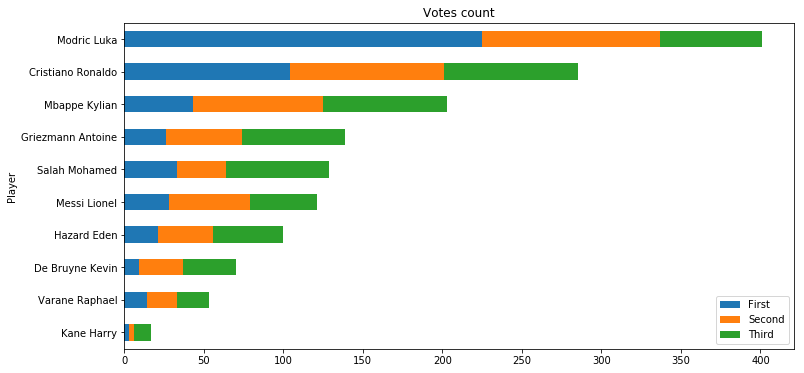

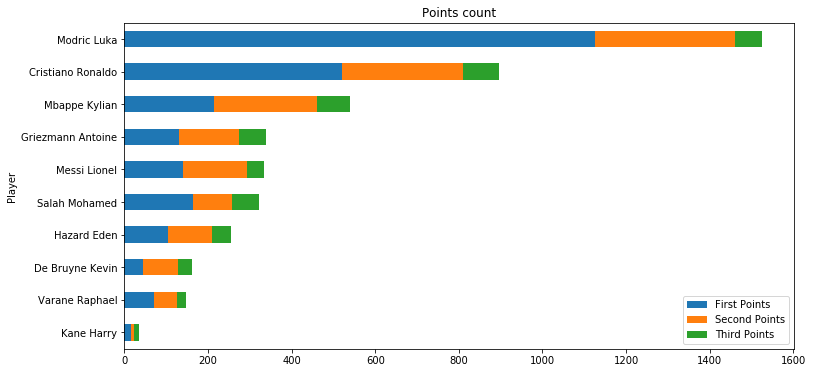

In [198]:
results_all[['First','Second','Third']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Votes count")

results_all_p = results_all.sort_values(by=['Total Points'],ascending=True)

results_all_p[['First Points','Second Points','Third Points']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Points count")


# Players votes

In [199]:
results_player = get_ranked_list(df_players)
results_player.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,First,Second,Third,Total Votes,First Points,Second Points,Third Points,Total Points
Player,,,,,,,,
Modric Luka,66,31,30,127,330,93,30,453
Cristiano Ronaldo,43,42,24,109,215,126,24,365
Mbappe Kylian,12,27,28,67,60,81,28,169
Messi Lionel,14,23,15,52,70,69,15,154
Salah Mohamed,15,15,20,50,75,45,20,140
Hazard Eden,10,5,12,27,50,15,12,77
Griezmann Antoine,1,9,22,32,5,27,22,54
De Bruyne Kevin,2,11,6,19,10,33,6,49
Varane Raphael,5,5,6,16,25,15,6,46


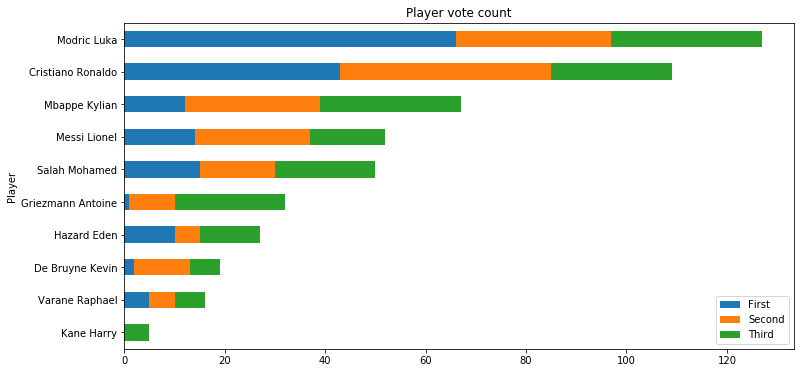

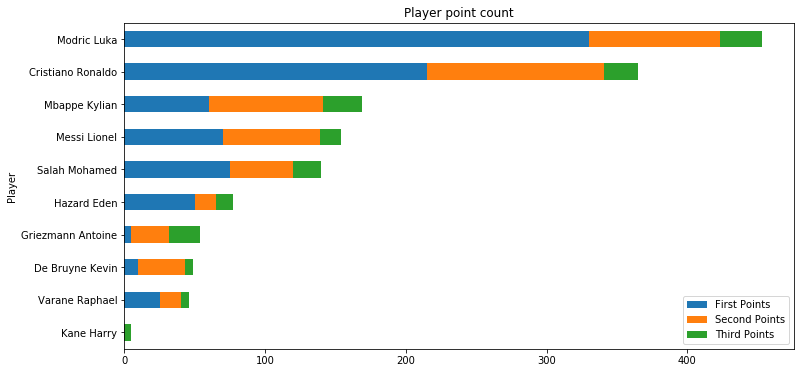

In [200]:
results_player[['First','Second','Third']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Player vote count")

results_player_p = results_player.sort_values(by=['Total Points'],ascending=True)

results_player_p[['First Points','Second Points','Third Points']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Player point count")

# Coach votes

In [201]:
results_coach = get_ranked_list(df_coaches)
results_coach.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,First,Second,Third,Total Votes,First Points,Second Points,Third Points,Total Points
Player,,,,,,,,
Modric Luka,81,38,16,135,405,114,16,535
Cristiano Ronaldo,26,27,24,77,130,81,24,235
Mbappe Kylian,10,29,30,69,50,87,30,167
Hazard Eden,10,21,25,56,50,63,25,138
Griezmann Antoine,13,15,21,49,65,45,21,131
Messi Lionel,11,13,9,33,55,39,9,103
Salah Mohamed,8,7,21,36,40,21,21,82
De Bruyne Kevin,7,10,15,32,35,30,15,80
Varane Raphael,2,9,5,16,10,27,5,42


# Media votes

In [202]:
results_media = get_ranked_list(df_media)
results_media.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,First,Second,Third,Total Votes,First Points,Second Points,Third Points,Total Points
Player,,,,,,,,
Modric Luka,78,43,18,139,390,129,18,537
Cristiano Ronaldo,35,28,36,99,175,84,36,295
Mbappe Kylian,21,26,20,67,105,78,20,203
Griezmann Antoine,12,24,22,58,60,72,22,154
Salah Mohamed,10,9,24,43,50,27,24,101
Messi Lionel,3,15,18,36,15,45,18,78
Varane Raphael,7,5,9,21,35,15,9,59
Hazard Eden,1,9,7,17,5,27,7,39
De Bruyne Kevin,0,7,12,19,0,21,12,33


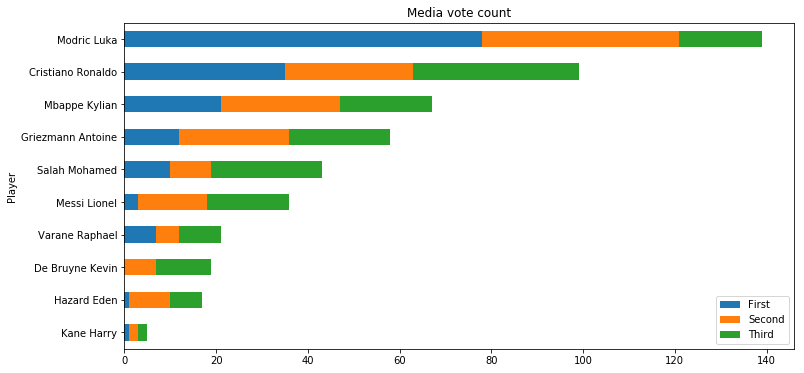

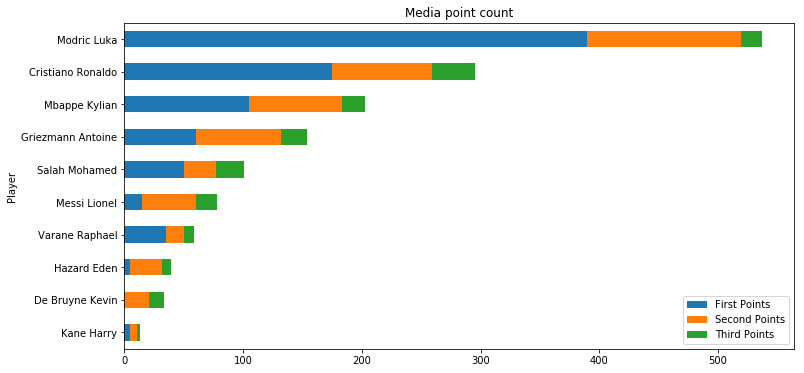

In [203]:
results_media[['First','Second','Third']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Media vote count")

results_media_p = results_media.sort_values(by=['Total Points'],ascending=True)

results_media_p[['First Points','Second Points','Third Points']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Media point count")

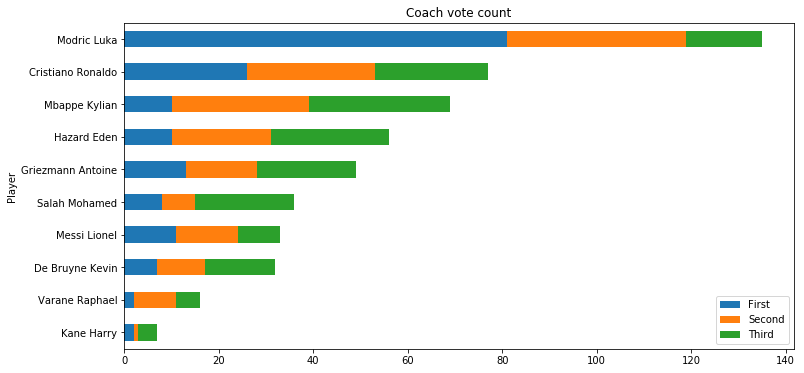

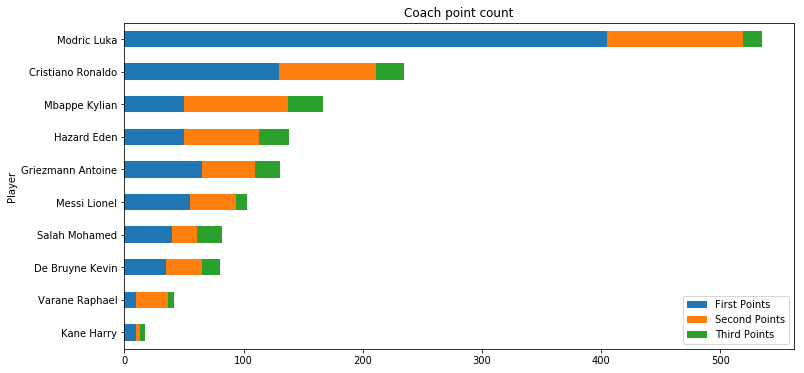

In [204]:
results_coach[['First','Second','Third']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Coach vote count")

results_coach_p = results_coach.sort_values(by=['Total Points'],ascending=True)

results_coach_p[['First Points','Second Points','Third Points']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Coach point count")

# Voting categories : conclusions

In [205]:
data =[]
for player in player_list:
    player_total = results_all.loc[player]['Total Points']
    coach_p = results_coach_p.loc[player]['Total Points']
    player_p = results_player_p.loc[player]['Total Points']
    media_p= results_media_p.loc[player]['Total Points']
    

    data.append([player,player_p,coach_p,media_p,player_total])
category_df=pd.DataFrame(data,columns=['Player','Captain','Coach','Media','Total Points']).set_index('Player')

In [206]:
category_df.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,Captain,Coach,Media,Total Points
Player,,,,
Modric Luka,453,535,537,1525
Cristiano Ronaldo,365,235,295,895
Mbappe Kylian,169,167,203,539
Griezmann Antoine,54,131,154,339
Messi Lionel,154,103,78,335
Salah Mohamed,140,82,101,323
Hazard Eden,77,138,39,254
De Bruyne Kevin,49,80,33,162
Varane Raphael,46,42,59,147


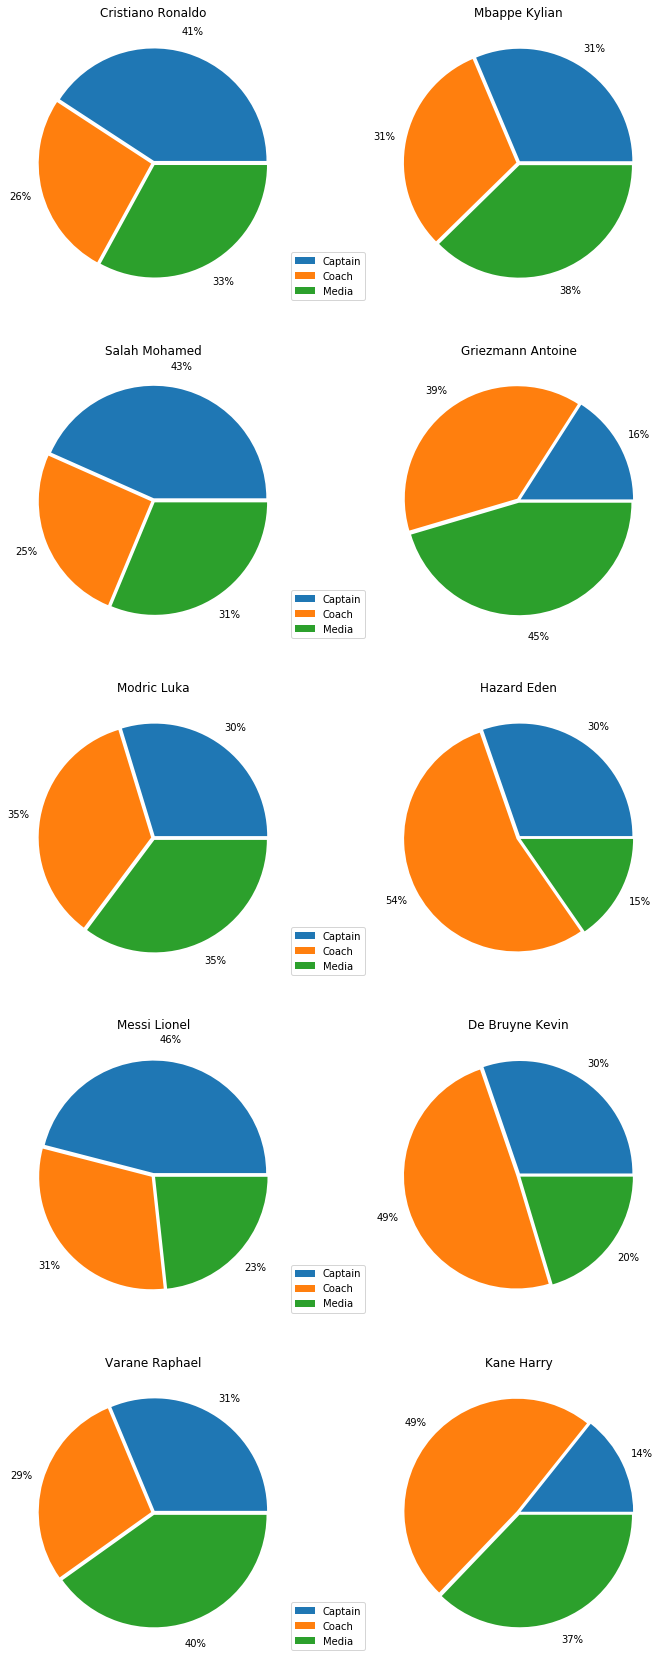

In [207]:
show_pie_charts(category_df,['Captain','Coach','Media'])

# UEFA

In [19]:
df_uefa = df[df['Country'].isin(uefa)]
results_uefa = get_ranked_list(df_uefa)
results_uefa.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,First,Second,Third,Total Votes,First Points,Second Points,Third Points,Total Points
Player,,,,,,,,
Modric Luka,89,32,18,139,445,96,18,559
Cristiano Ronaldo,22,35,31,88,110,105,31,246
Mbappe Kylian,9,25,19,53,45,75,19,139
Griezmann Antoine,11,16,21,48,55,48,21,124
Salah Mohamed,12,9,21,42,60,27,21,108
Messi Lionel,7,12,10,29,35,36,10,81
Hazard Eden,3,12,17,32,15,36,17,68
Varane Raphael,4,10,10,24,20,30,10,60
De Bruyne Kevin,3,9,11,23,15,27,11,53


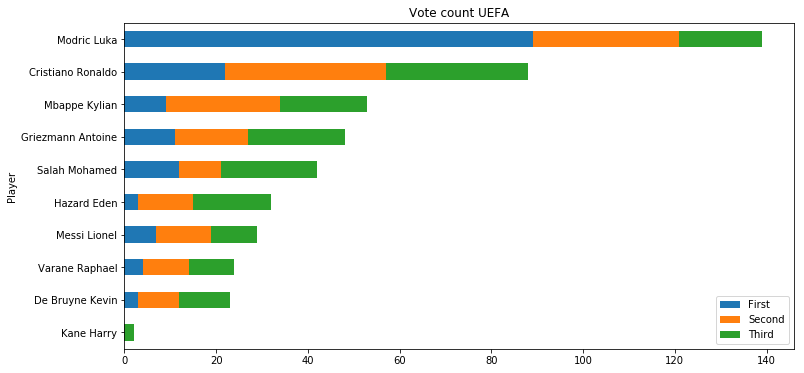

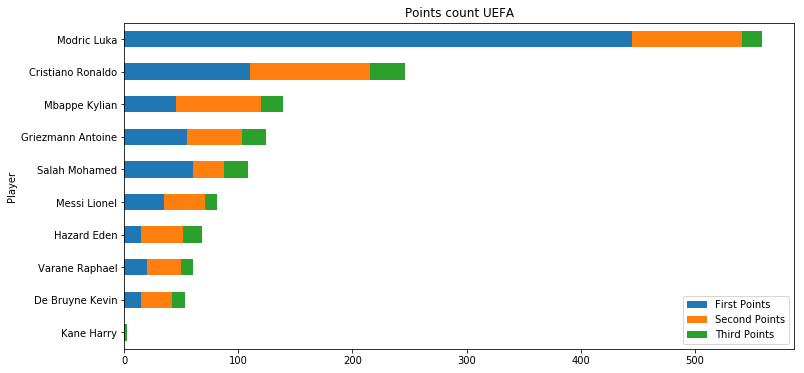

In [20]:
results_uefa[['First','Second','Third']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Vote count UEFA")

results_uefa_p = results_uefa.sort_values(by=['Total Points'],ascending=True)

results_uefa_p[['First Points','Second Points','Third Points']]\
    .plot.barh(stacked=True,figsize=(12,6),title="Points count UEFA")


# CAF

In [21]:
df_caf = df[df['Country'].isin(caf)]
results_caf = get_ranked_list(df_caf)
results_caf.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,First,Second,Third,Total Votes,First Points,Second Points,Third Points,Total Points
Player,,,,,,,,
Modric Luka,35,25,14,74,175,75,14,264
Cristiano Ronaldo,34,18,14,66,170,54,14,238
Mbappe Kylian,14,23,23,60,70,69,23,162
Salah Mohamed,8,10,22,40,40,30,22,92
Messi Lionel,9,11,9,29,45,33,9,87
Hazard Eden,4,9,8,21,20,27,8,55
Griezmann Antoine,3,9,12,24,15,27,12,54
Varane Raphael,5,4,5,14,25,12,5,42
De Bruyne Kevin,2,4,5,11,10,12,5,27


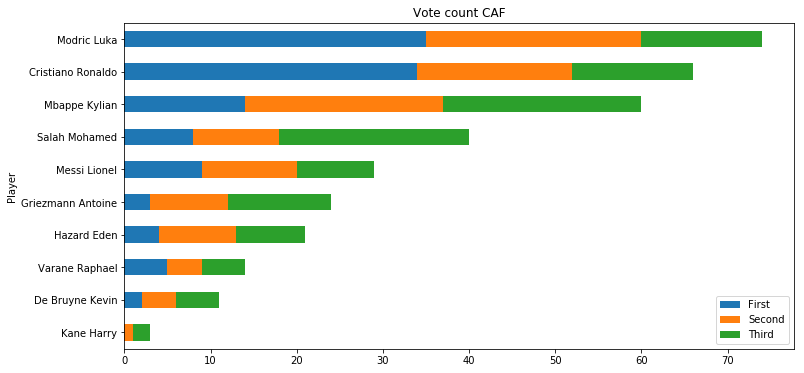

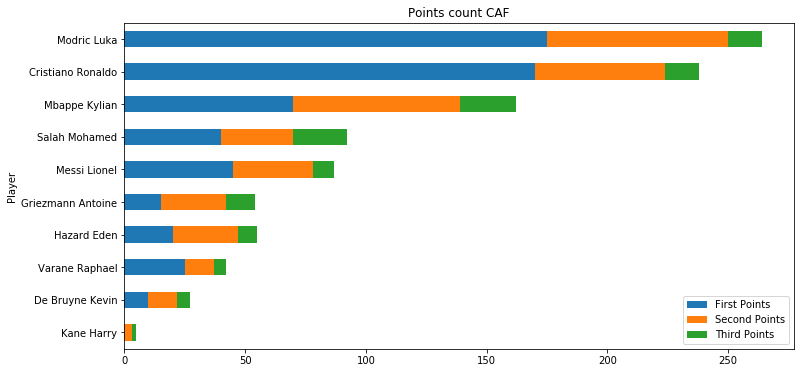

In [22]:
results_caf[['First','Second','Third']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Vote count CAF")

results_caf_p = results_caf.sort_values(by=['Total Points'],ascending=True)

results_caf[['First Points','Second Points','Third Points']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Points count CAF")

# CONMEBOL

In [23]:
df_cbol = df[df['Country'].isin(conmebol)]
results_cbol = get_ranked_list(df_cbol)
results_cbol.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,First,Second,Third,Total Votes,First Points,Second Points,Third Points,Total Points
Player,,,,,,,,
Modric Luka,11,9,3,23,55,27,3,85
Griezmann Antoine,4,4,3,11,20,12,3,35
Cristiano Ronaldo,2,3,7,12,10,9,7,26
Hazard Eden,3,3,1,7,15,9,1,25
Messi Lionel,2,1,5,8,10,3,5,18
Mbappe Kylian,0,2,3,5,0,6,3,9
Varane Raphael,1,1,0,2,5,3,0,8
De Bruyne Kevin,1,0,1,2,5,0,1,6
Salah Mohamed,0,1,1,2,0,3,1,4


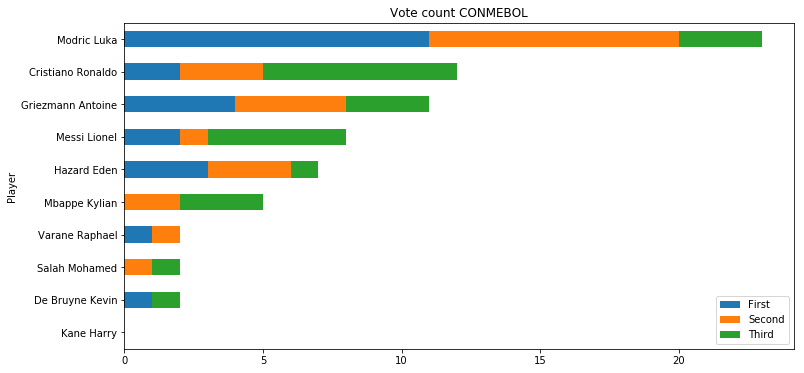

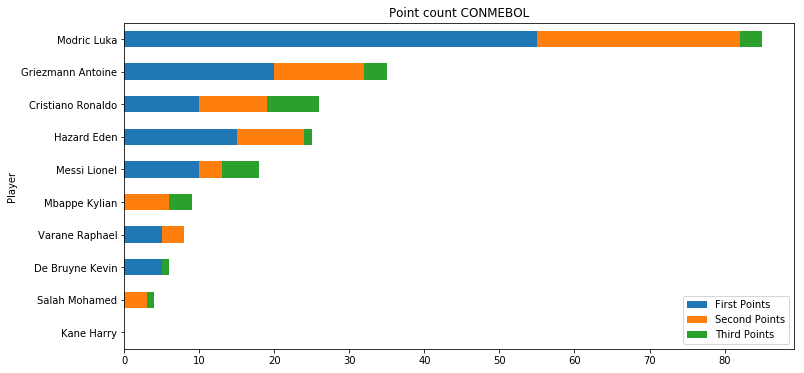

In [24]:
results_cbol[['First','Second','Third']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Vote count CONMEBOL")

results_cbol_p = results_cbol.sort_values(by=['Total Points'],ascending=True)

results_cbol_p[['First Points','Second Points','Third Points']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Point count CONMEBOL")

# CONCACAF

In [25]:
df_concacaf = df[df['Country'].isin(concacaf)]
results_concacaf = get_ranked_list(df_concacaf)
results_concacaf.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,First,Second,Third,Total Votes,First Points,Second Points,Third Points,Total Points
Player,,,,,,,,
Modric Luka,27,15,10,52,135,45,10,190
Cristiano Ronaldo,13,18,12,43,65,54,12,131
Mbappe Kylian,9,8,13,30,45,24,13,82
Messi Lionel,4,9,6,19,20,27,6,53
Griezmann Antoine,4,4,13,21,20,12,13,45
Salah Mohamed,5,3,6,14,25,9,6,40
Hazard Eden,5,3,4,12,25,9,4,38
De Bruyne Kevin,2,8,3,13,10,24,3,37
Varane Raphael,1,2,1,4,5,6,1,12


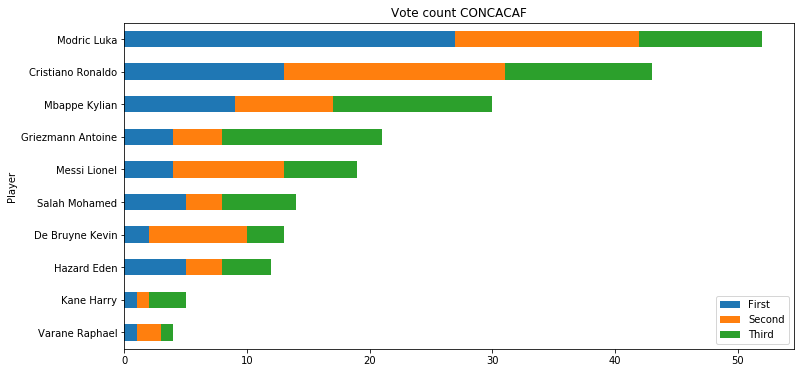

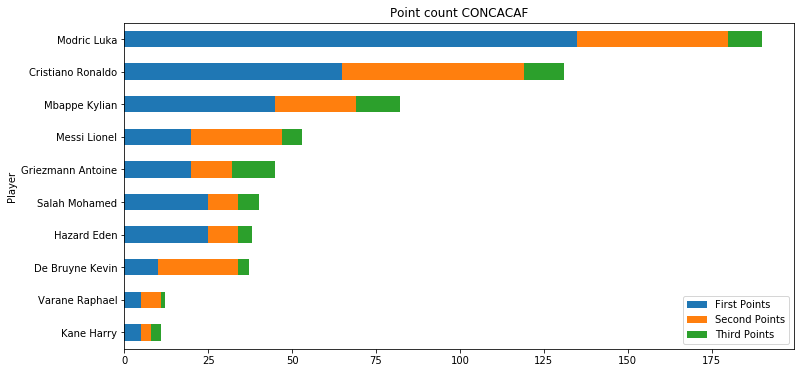

In [26]:
results_concacaf[['First','Second','Third']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Vote count CONCACAF")

results_concacaf_p = results_concacaf.sort_values(by=['Total Points'],ascending=True)

results_concacaf_p[['First Points','Second Points','Third Points']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Point count CONCACAF")

# AFC

In [27]:
df_afc = df[df['Country'].isin(afc)]
results_afc = get_ranked_list(df_afc)
results_afc.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,First,Second,Third,Total Votes,First Points,Second Points,Third Points,Total Points
Player,,,,,,,,
Modric Luka,53,23,19,95,265,69,19,353
Cristiano Ronaldo,29,19,16,64,145,57,16,218
Mbappe Kylian,8,20,17,45,40,60,17,117
Messi Lionel,6,16,9,31,30,48,9,87
Salah Mohamed,8,8,13,29,40,24,13,77
Hazard Eden,6,8,11,25,30,24,11,65
Griezmann Antoine,2,12,14,28,10,36,14,60
De Bruyne Kevin,1,7,11,19,5,21,11,37
Varane Raphael,2,2,2,6,10,6,2,18


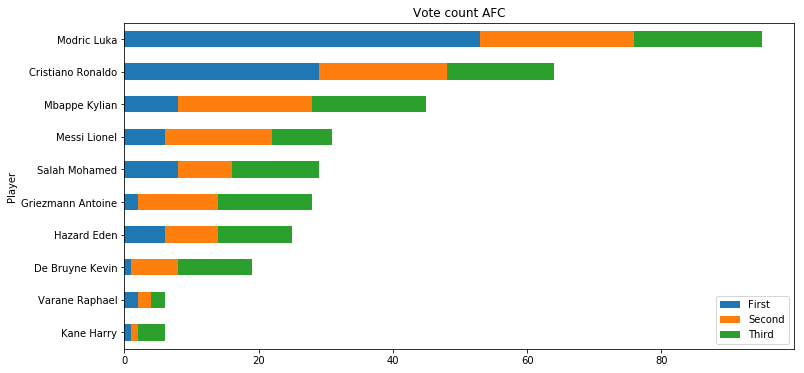

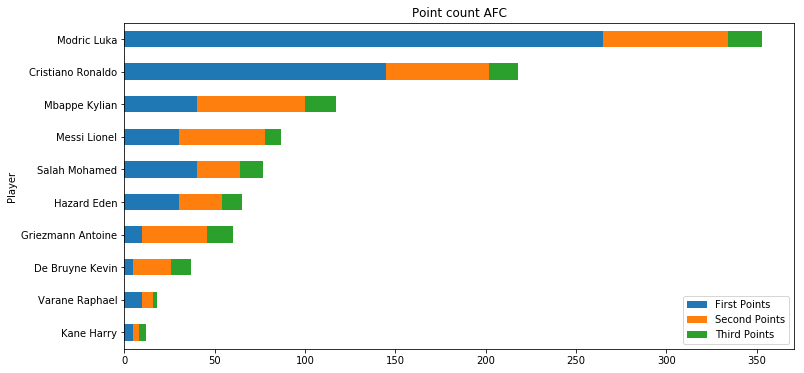

In [28]:
results_afc[['First','Second','Third']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Vote count AFC")

results_afc_p = results_afc.sort_values(by=['Total Points'],ascending=True)

results_afc_p[['First Points','Second Points','Third Points']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Point count AFC")

# OFC

In [29]:
df_ofc= df[df['Country'].isin(ofc)]
results_ofc = get_ranked_list(df_ofc)
results_ofc.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,First,Second,Third,Total Votes,First Points,Second Points,Third Points,Total Points
Player,,,,,,,,
Modric Luka,8,8,0,16,40,24,0,64
Cristiano Ronaldo,3,3,2,8,15,9,2,26
Mbappe Kylian,3,1,2,6,15,3,2,20
Griezmann Antoine,2,3,1,6,10,9,1,20
Messi Lionel,0,2,2,4,0,6,2,8
Varane Raphael,1,0,2,3,5,0,2,7
De Bruyne Kevin,0,1,2,3,0,3,2,5
Kane Harry,1,0,0,1,5,0,0,5
Salah Mohamed,0,0,4,4,0,0,4,4


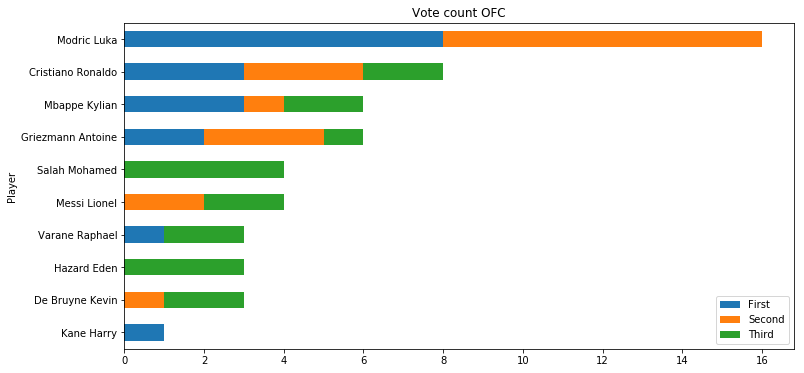

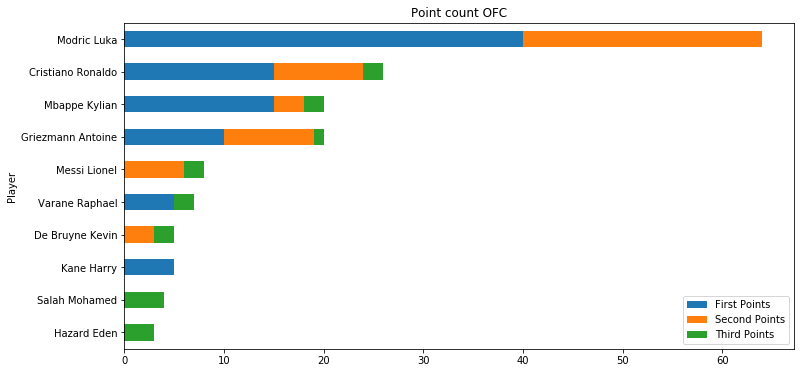

In [30]:
results_ofc[['First','Second','Third']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Vote count OFC")

results_ofc_p = results_ofc.sort_values(by=['Total Points'],ascending=True)

results_ofc_p[['First Points','Second Points','Third Points']]\
    .plot(kind='barh', stacked=True,figsize=(12,6),title="Point count OFC")

# Confederations : conclusion

In [46]:
data =[]
for player in player_list:
    player_total = results_all.loc[player]['Total Points']
    afc_p = results_afc_p.loc[player]['Total Points']
    caf_p = results_caf_p.loc[player]['Total Points']
    concacaf_p = results_concacaf_p.loc[player]['Total Points']
    cbol_p = results_cbol_p.loc[player]['Total Points']
    ofc_p = results_ofc_p.loc[player]['Total Points']
    uefa_p = results_uefa_p.loc[player]['Total Points']

    data.append([player,afc_p,caf_p,concacaf_p,cbol_p,ofc_p,uefa_p,player_total])
confed_df=pd.DataFrame(data,columns=['Player','AFC','CAF','CONCACAF','CONMEBOL',
                                      'OFC','UEFA','Total Points']).set_index('Player')

In [47]:
confed_df.iloc[::-1].sort_values(by=['Total Points'],ascending=False)

,AFC,CAF,CONCACAF,CONMEBOL,OFC,UEFA,Total Points
Player,,,,,,,
Modric Luka,353,264,190,85,64,559,1525
Cristiano Ronaldo,218,238,131,26,26,246,895
Mbappe Kylian,117,162,82,9,20,139,539
Griezmann Antoine,60,54,45,35,20,124,339
Messi Lionel,87,87,53,18,8,81,335
Salah Mohamed,77,92,40,4,4,108,323
Hazard Eden,65,55,38,25,3,68,254
De Bruyne Kevin,37,27,37,6,5,53,162
Varane Raphael,18,42,12,8,7,60,147


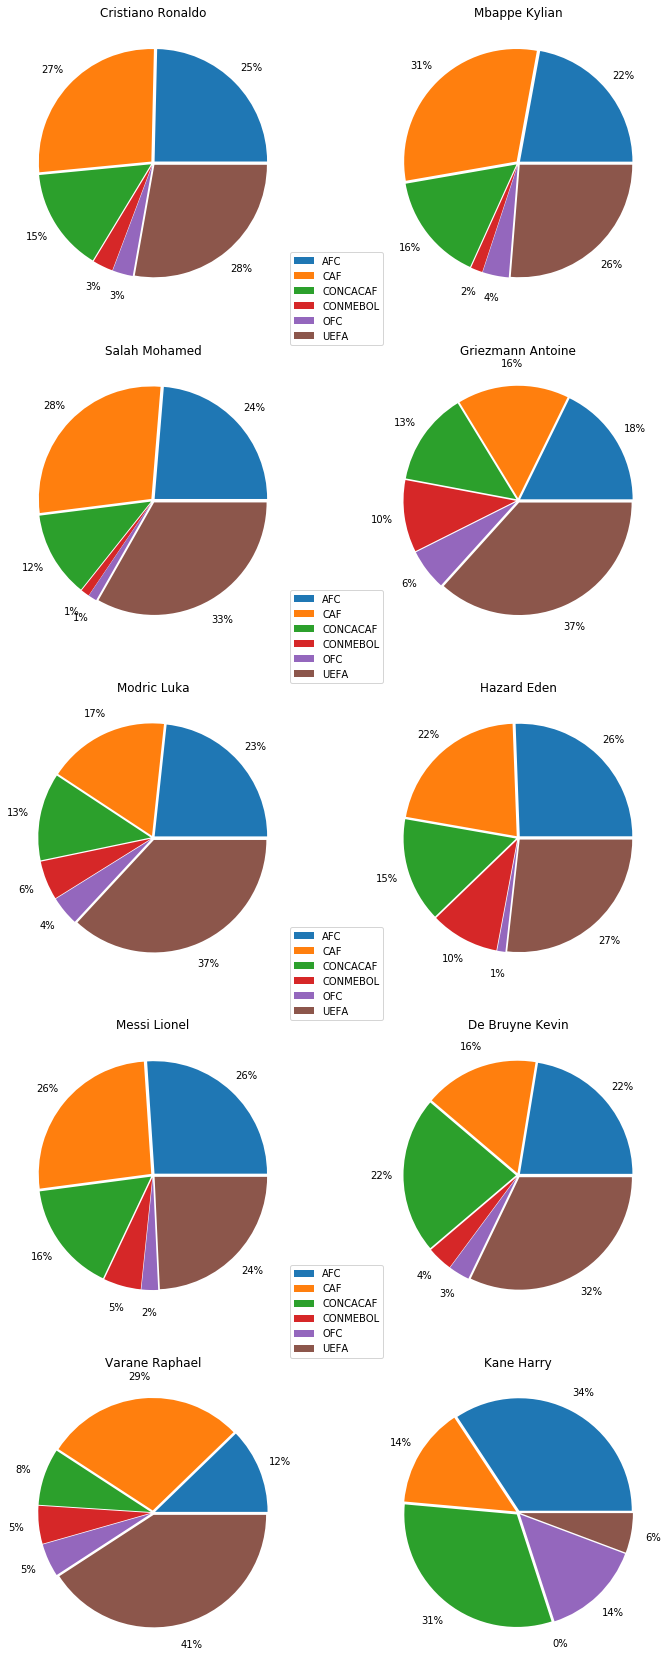

In [175]:
show_pie_charts(confed_df,['AFC','CAF','CONCACAF','CONMEBOL','OFC','UEFA'])